## Dataset

GTZAN Genre Collection(http://marsyasweb.appspot.com/download/data_sets/)

The music format is AU, first use SOX to change the format to wav.

##  Environment and Python Libraries

Proudly used Anaconda, Python 3

- matplotlib
- scipy
- numpy
- scikit_learn
- python_speech_features(https://github.com/jameslyons/python_speech_features)


In [1]:
%pylab inline


import warnings 
warnings.filterwarnings('ignore')

# numerical processing and scientific libraries
import numpy as np
import scipy

#signal processing 
from scipy.io import wavfile

# plot
from matplotlib.pyplot import specgram

#features extraction
from features import mfcc
from features import logfbank

# file processing
import glob
import os

Populating the interactive namespace from numpy and matplotlib


##  Music files 🎵

see some spectrum of the some files

In [2]:
def plotspecgram(file):
    print(file)
    sample_rate,X = wavfile.read(file)
    specgram(X,Fs = sample_rate,xextent = (0,30))

gerne/classical/classical.00000.wav


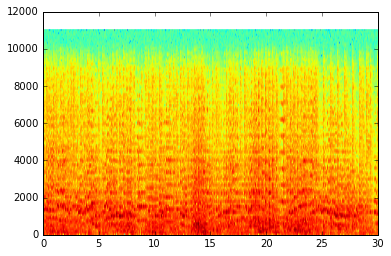

In [3]:
plotspecgram('gerne/classical/classical.00000.wav')

gerne/rock/rock.00000.wav


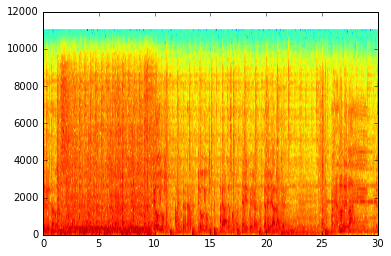

In [4]:
plotspecgram('gerne/rock/rock.00000.wav')

gerne/country/country.00000.wav


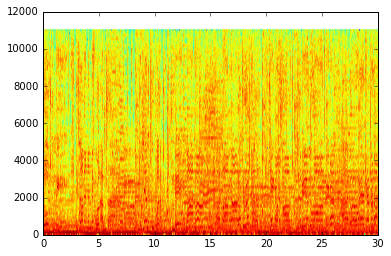

In [5]:
plotspecgram('gerne/country/country.00000.wav')

gerne/metal/metal.00000.wav


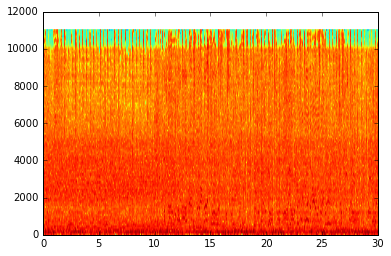

In [6]:
plotspecgram('gerne/metal/metal.00000.wav')

We can see tell some difference from spectrum, load 3 songs of each kind:


![image](specgram.jpeg)

## Feature Extraction

 music information retrieval

Therea ara many problems with music genre classification : 

 - One single song may contain a lot of information, a lot of features. Spectrum is just one aspect, we can draw many other different kinds of graphs, lyrics may also exist. There are many models and features have been used to classify the music genre, according to some previous work[1], I will use MFCC(Mel Frequency Cepstral Coefficients) as the feature.
 - One song can belong to several gernes, such as both folk and country, they're very similar. And different people may have different opinions.


Here I will only try to classify four kinds, and one song only belong to one genre:


- classical
- rock
- country
- metal


## MFCC

In [7]:
# one classical song's mfcc

(rate,sig) = wavfile.read("gerne/classical/classical.00000.wav")
mfcc_feat = mfcc(sig,rate)

print(len(mfcc_feat))
print(type(mfcc_feat))
print(mfcc_feat.shape)

3007
<class 'numpy.ndarray'>
(3007, 13)


In [8]:
mfcc_feat

array([[ 16.95265213,  -5.19005001, -22.05732421, ...,   0.22205473,
          8.8615755 , -21.77953761],
       [ 17.44216978,  -4.82991704, -25.17441583, ...,   0.51758538,
          9.59437025, -15.37998141],
       [ 17.71620654,  -2.28772262, -26.25829949, ...,   4.8571412 ,
          0.03398185, -12.47800265],
       ..., 
       [ 16.47485417,   4.83733429, -15.72835686, ..., -10.14964296,
         13.46351878,  10.21120361],
       [ 16.03475936,   5.5770505 , -15.94843341, ...,  -3.69882337,
          5.43464981,  -3.27049331],
       [ 15.77409688,   5.50179877, -15.86223217, ...,   1.77429482,
          6.56804317,   1.88013327]])

Get a general idea, like the range of the mfcc feature :

In [9]:
print(ptp(mfcc_feat,axis = 1))

[ 39.00997634  45.90402048  48.26870196 ...,  53.16560613  49.77241493
  49.82921237]


In [10]:
print(ptp(mfcc_feat,axis = 0))

[   7.44180869   38.34284286   44.81929158   55.66167759   66.44178782
   68.96427857   70.95561818   67.59971073   73.92624122  113.82337156
   70.76934865   77.44275753   70.61440572]


Tested on different songs, the mfcc feature is around 3000 * 13.

13 features, around 3000 rows, even though we have reduced the song to 3000 * 13, it is still too many for a song.

Approach 1, mean the mfcc:

After these actions:

one song -> 13 numbers stand for 13 features

In [11]:
def convert_to_mfccmean(file):
    (rate,sig) = wavfile.read(file)
    ceps = mfcc(sig,rate)
    num_ceps = len(ceps)
    x = np.mean(ceps[int(num_ceps*0.1):int(num_ceps*0.9)],axis = 0)
    return x
x = convert_to_mfccmean('_mp3.wav')


### Generate csv file

The format would be like x0,x1,x2...x12, class

这样是否reliable？ 是否可以依靠这些feature 呢？


做法二：

把所有的wav -> mfcc file

然后读入之后再做平均，是否有这个必要

# 分界线1

---

In [12]:
genre_list = ['classical','rock','country','metal']

GENRE_DIR = '/Users/XueYu/MachineLearningNotes/gerne'



def create_X_y(genre_list, base_dir = GENRE_DIR):
    X, y, Xy   = [],[],[]
    for label, genre in enumerate(genre_list):
        for file in glob.glob(os.path.join(base_dir,genre,'*.wav')):
            print(file)
            mean_mfcc = convert_to_mfccmean(file)
            X.append(mean_mfcc)
            y.append(label)
            Xy.append(mean_mfcc.tolist() + [label])
    return np.array(X),np.array(y),np.array(Xy)

In [13]:
X,y,Xy = create_X_y(genre_list)



/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00000.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00001.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00002.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00003.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00004.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00005.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00006.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00007.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00008.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00009.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00010.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00011.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00012.wav
/Users/XueYu/MachineLearningNotes/gerne/classical/classical.00013.wav
/Users/XueYu/Machine

In [14]:
print(X.shape)
print(y.shape)
print(Xy.shape)

(400, 13)
(400,)
(400, 14)


In [21]:
np.savetxt(
    'musicdata.csv',           # file name
    Xy,                # array to save
    fmt='%.8f',             # formatting, 2 digits in this case
    delimiter=',',          # column delimiter
    newline='\n',           # new line character
    footer='end of file',   # file footer
    comments='# ',          # character to use for comments
    header='x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,class')      # file header

这里存疑，是否足够代表音乐？

这些feature可以用么？ 是否需要方差等等等等？ 数据是否需要normalize？

然后先不管那些，先


# 分界线

---


Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. 

在多元统计分析中，主成分分析（英语：Principal components analysis，PCA）是一種分析、簡化數據集的技術。主成分分析经常用于减少数据集的维数，同时保持数据集中的对方差贡献最大的特征。

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

print(pca_2d.shape)
print(y.shape)
pca_2d

(400, 2)
(400,)


array([[ -5.12093947,  14.45977858],
       [ -9.74412055,  15.62269326],
       [ -4.21162427,  14.11082574],
       [ -5.48284828,   8.60211663],
       [ -3.03941623,  14.53999761],
       [ -6.47686981,  16.17209843],
       [ -4.68914673,  16.81662997],
       [ -1.5378849 ,  12.1306419 ],
       [ -3.42840492,  15.34782551],
       [ -2.15265693,  12.081667  ],
       [ -5.96087773,  13.41995485],
       [-24.84854504,  16.04594451],
       [-15.66807088,  17.80368895],
       [ -8.80577036,  16.09867397],
       [-14.95478531,  21.06049178],
       [ -0.91925998,  10.7382136 ],
       [-10.3287088 ,  13.97414237],
       [-10.68567798,  18.40591137],
       [-11.16557564,  13.63160763],
       [ -5.10134056,   9.39284064],
       [-11.47085672,  17.69117301],
       [-13.31275238,  19.86931846],
       [-11.69823093,  15.75082691],
       [ -7.66276831,  12.76636349],
       [-10.98267666,  17.49896311],
       [-13.58253679,  18.47250904],
       [-19.18247563,  17.53876599],
 

下面这幅图只是降维之后的图，所以能否说明问题？

同时，可以看出来，做过降维处理的classical 和 metal也比较好分辨


但是country和 rock 以及别的比较混杂

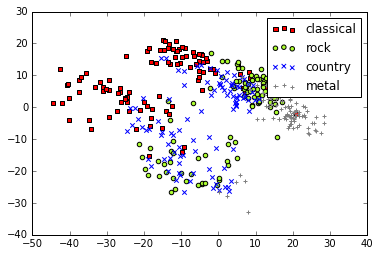

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x'],['gray','+']]
for i in range(len(colormarkers)):
    px = pca_2d[:, 0][y == i]
    py = pca_2d[:, 1][y == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])
plt.legend(genre_list)

 # 第一个Classifier,linear classifier 

In [17]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state= 1)
print(X_train.shape,y_train.shape)

#先不normailize


(300, 13) (300,)


In [18]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
#fit (train) the classifier

clf.fit(X_train,y_train)
#print the learned coeficients

print(clf.coef_)
print(clf.intercept_)

[[-612.70421215  137.12678222 -492.06498707 -336.16667877 -330.94578042
  -190.63398889  -55.84113447   91.28195189  121.73376551  188.79544358
   -26.17802664   68.71541495  203.74228152]
 [ -69.33895409 -296.48335211  120.82293136 -346.14944089  170.2270765
   487.10587535  -42.59739563 -181.40952776  -67.83818164 -218.71694048
   -30.86067992 -351.83095627   74.0578249 ]
 [ 159.45730093  217.4478585   203.2022824    65.69274608  228.03206197
  -237.54964132  105.97055445  134.21430696 -137.82397498  293.39343542
   180.7880368    50.49473421   67.12920014]
 [-667.85147272 -598.23082404 -278.6350472   629.33258314   35.62681703
    73.67220424  264.68924825  140.4821467   255.45226249   64.02371245
  -174.30772706  234.21613045 -251.25086904]]
[   0.75499211  -41.81231761  -50.71796056 -105.15304774]


In [19]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train,y_train_pred))

0.73


In [20]:
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.69


In [21]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.73      0.96      0.83        23
          1       0.38      0.26      0.31        19
          2       0.88      0.50      0.64        30
          3       0.68      0.96      0.79        28

avg / total       0.70      0.69      0.66       100



In [22]:
from matplotlib import pylab
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[22  0  1  0]
 [ 2  5  1 11]
 [ 5  8 15  2]
 [ 1  0  0 27]]


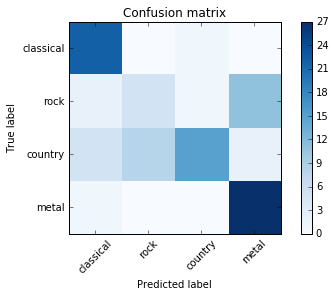

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(genre_list))
    plt.xticks(tick_marks, genre_list, rotation=45)
    plt.yticks(tick_marks, genre_list)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cm)

In [24]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[ 0.95652174  0.          0.04347826  0.        ]
 [ 0.10526316  0.26315789  0.05263158  0.57894737]
 [ 0.16666667  0.26666667  0.5         0.06666667]
 [ 0.03571429  0.          0.          0.96428571]]


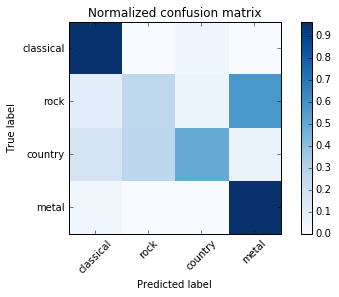

In [25]:
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')


## classifier with data normalization


In [26]:
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=1)

scaler = StandardScaler().fit(X_train)
X_train1 = scaler.transform(X_train1)

X_test1 = scaler.transform(X_test1)


# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train1, y_train1)


from sklearn import metrics
y_train_pred1 = clf.predict(X_train1)
print(metrics.accuracy_score(y_train1, y_train_pred1))

y_pred1 = clf.predict(X_test1)
print(metrics.accuracy_score(y_test1, y_pred1))

0.77
0.73


来试试吧，用下载转的20首classical歌曲，问题有这几点:

** The tracks are all 22050Hz Mono 16-bit audio files in .wav format.**

所以一定也要转为16 bit 的22050Hz Mono File，感谢iTunes.





y_predict
Out[28]: array([0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

所以预测的还行啊~~~~~~~~

问题是就是转格式有点麻烦，即使是这种非常初级的classifier已经分类的不错了，当然，我的数据本身也有小问题，比如同类的。（棒！！！！！！！！！！！！！！！！！）


### 用random来预测

In [27]:
from random import randint
y_rd = []
for i in range(len(y_pred)):
    y_rd.append(randint(0,3))
y_rd = np.array(y_rd)
print(y_rd)
print(y_test)
print(metrics.accuracy_score(y_test,y_rd))


[2 1 1 1 0 0 1 0 1 2 3 3 3 2 3 2 1 0 2 2 2 0 0 3 2 3 3 3 0 2 1 0 1 2 0 2 1
 1 3 1 1 1 1 0 2 3 3 0 0 1 2 1 3 0 2 3 2 0 3 0 2 3 1 3 2 3 3 2 0 2 1 0 1 0
 1 1 0 3 3 2 3 0 0 0 3 2 3 3 3 2 0 2 1 3 0 3 2 0 1 1]
[3 1 3 3 1 3 1 2 0 2 1 3 1 3 3 2 3 0 0 2 1 2 3 2 0 0 3 2 3 2 0 0 1 2 0 0 0
 1 3 1 2 2 1 0 3 0 3 3 3 2 0 2 2 0 2 2 2 1 2 3 1 0 2 2 3 2 1 3 2 3 2 0 3 3
 0 3 0 1 1 2 0 0 2 0 0 0 3 2 3 1 1 3 2 3 1 3 2 2 2 1]
0.34


# 用SVM来预测

In [37]:
from sklearn import svm

C = 1 # SVM regularization parameter
clf = svm.LinearSVC(C=C)


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
train_acc = metrics.accuracy_score(y_train,clf.predict(X_train))

print(train_acc)
print(metrics.accuracy_score(y_test,y_pred))


0.81
0.78


In [28]:
def learn_result(X_train,y_train,X_test,y_test,Classifier):
	if Classifier == "SGD":
		from sklearn.linear_model import SGDClassifier
		clf = SGDClassifier()
	if Classifier == "KNN":
		from sklearn.neighbors import KNeighborsClassifier
		clf = KNeighborsClassifier()
	if Classifier == "SVM":
		from sklearn import svm
		clf = svm.LinearSVC()
	if Classifier == "NN":
		from sknn.mlp import Classifier, Layer
		clf = Classifier(
			layers=[
			Layer("Sigmoid", units=100, pieces=2),
			Layer("Softmax")],
			learning_rate=0.001,
			n_iter=25)
	if Classifier == "RF":
		from sklearn.ensemble import RandomForestClassifier
		clf = RandomForestClassifier(n_estimators=10)
	if Classifier == "GNB":
		from sklearn.naive_bayes import GaussianNB
		clf = GaussianNB()

	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	train_acc = metrics.accuracy_score(y_train,clf.predict(X_train))
	test_acc = metrics.accuracy_score(y_test,y_pred)
	return train_acc,test_acc,y_pred

In [29]:
Classifiers = ["SGD","KNN","SVM","NN","RF","GNB"]
train_accs = []
test_accs = []

for Classifier in Classifiers:
	train_acc,test_acc,_ = learn_result(X_train,y_train,X_test,y_test,Classifier)
	train_acc_perc = round(train_acc*100,2)
	test_acc_perc = round(test_acc*100,2)
	train_accs.append(train_acc_perc)
	test_accs.append(test_acc_perc)
    
print(train_accs)
print(test_accs)

[76.0, 86.670000000000002, 78.0, 88.0, 99.329999999999998, 75.0]
[74.0, 78.0, 72.0, 74.0, 80.0, 71.0]


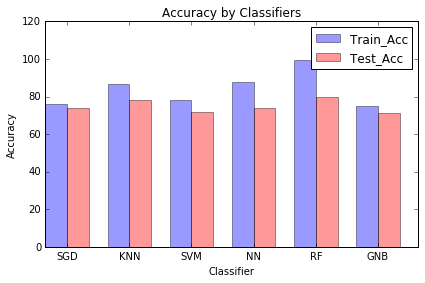

In [30]:
%matplotlib inline


import numpy as np  
import matplotlib.pyplot as plt  

n_groups = len(Classifiers) 

fig, ax = plt.subplots()  
index = np.arange(n_groups)  
bar_width = 0.35  
   
opacity = 0.4  
rects1 = plt.bar(index, train_accs, bar_width,alpha=opacity, color='b',label= 'Train_Acc')  
rects2 = plt.bar(index + bar_width, test_accs, bar_width,alpha=opacity,color='r',label='Test_Acc')  
   
plt.xlabel('Classifier')  
plt.ylabel('Accuracy')  
plt.title('Accuracy by Classifiers')  
plt.xticks(index + bar_width, ("SGD","KNN","SVM","NN","RF","GNB"))  
plt.ylim(0,120)  
plt.legend()  
   
plt.tight_layout()  
plt.show()  

In [43]:
sgd_train_acc, sgd_test_acc, sgd_y_pred = learn_result(X_train,y_train,X_test,y_test,"SGD")
print(sgd_train_acc,sgd_test_acc)


0.723333333333 0.68


In [44]:
knn_train_acc, knn_test_acc, knn_y_pred = learn_result(X_train,y_train,X_test,y_test,"KNN")
print(knn_train_acc,knn_test_acc)


0.866666666667 0.78


In [45]:
svm_train_acc, svm_test_acc, svm_y_pred = learn_result(X_train,y_train,X_test,y_test,"SVM")
print(svm_train_acc,svm_test_acc)


0.676666666667 0.74


In [46]:
nn_train_acc, nn_test_acc, nn_y_pred = learn_result(X_train,y_train,X_test,y_test,"NN")
print(nn_train_acc,nn_test_acc)


0.86 0.76


In [48]:
rf_train_acc, rf_test_acc, rf_y_pred = learn_result(X_train,y_train,X_test,y_test,"RF")
print(rf_train_acc,rf_test_acc)


0.993333333333 0.78


In [49]:
gnb_train_acc, gnb_test_acc, gnb_y_pred = learn_result(X_train,y_train,X_test,y_test,"GNB")
print(gnb_train_acc,gnb_test_acc)

0.75 0.71


# Developed Test


In [31]:
test_list = ['classical30s','rock30s','country30s','metal30s']

TEST_DIR = '/Users/XueYu/MachineLearningNotes/moretest'

X_developed_test, y_developed_test,_ = create_X_y(test_list,TEST_DIR)

/Users/XueYu/MachineLearningNotes/moretest/classical30s/01 Albinoni - Concerto for 2 Oboes in F Major Op9 no3, 1 Allegro.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/01 Spring Mvt 1 Allegro.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/01 The Temperature of the Air on the Bow of the Kaleetan.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/02 Back to Home.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/02 Debussy - Printemps, II. Modéré.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/03 There's Probably No Time.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/04 Moonlight Reprise.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/04 Roennes, Trio for Three Bassoons.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/04 Veloma.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/05 Seeing The Future.wav
/Users/XueYu/MachineLearningNotes/moretest/classical30s/06 Remedy for Melancholy.wav
/U

In [32]:
Classifiers = ["SGD","KNN","SVM","NN","RF","GNB"]
train_accs = []
developed_test_accs = []

for Classifier in Classifiers:
	train_acc,test_acc,_ = learn_result(X_train,y_train,X_developed_test, y_developed_test,Classifier)
	train_acc_perc = round(train_acc*100,2)
	test_acc_perc = round(test_acc*100,2)
	train_accs.append(train_acc_perc)
	developed_test_accs.append(test_acc_perc)
    
print(train_accs)
print(developed_test_accs)

[55.670000000000002, 86.670000000000002, 77.670000000000002, 87.329999999999998, 99.670000000000002, 75.0]
[50.0, 45.0, 48.75, 60.0, 50.0, 48.75]


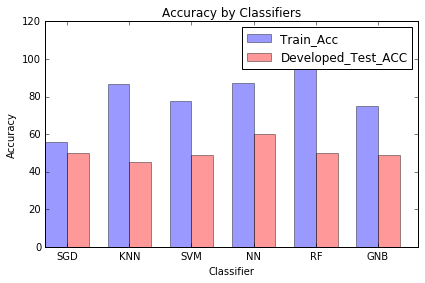

In [33]:
import numpy as np  
import matplotlib.pyplot as plt  

n_groups = len(Classifiers) 

fig, ax = plt.subplots()  
index = np.arange(n_groups)  
bar_width = 0.35  
   
opacity = 0.4  
rects1 = plt.bar(index, train_accs, bar_width,alpha=opacity, color='b',label= 'Train_Acc')  
rects2 = plt.bar(index + bar_width, developed_test_accs, bar_width,alpha=opacity,color='r',label='Developed_Test_ACC')  
   
plt.xlabel('Classifier')  
plt.ylabel('Accuracy')  
plt.title('Accuracy by Classifiers')  
plt.xticks(index + bar_width, ("SGD","KNN","SVM","NN","RF","GNB"))  
plt.ylim(0,120)  
plt.legend()  
   
plt.tight_layout()  
plt.show()  